0. 參數初始化

In [25]:
import matplotlib.pyplot as plt
import csv, os

os.chdir("C:/Serious/Program/Github/noodle_LLM/")

round_list = ["A", "B"]
dir_data_source = "./training/LLM_eval/evalOutput/"
dir_output = "./training/LLM_eval/graphOutput/"

# A
"lora_type2-8-50E64B_A",
"lora_type2-8-100E64B_A",
"lora_type2-128-50E64B_A",
"lora_type2-128-100E64B_A",
"lora_type2-256-50E64B_A",
"lora_type2-256-100E64B_A",
"lora_type3-256-100E32B_A",
"lora_type3-256-100E64B_A",
"lora_type3-256-100E128B_A",
"lora_type3-256-200E64B_A",
"lora_type3-256-300E64B_A",
# B
"lora_type2-8-50E64B_B",
"lora_type2-8-100E64B_B",
"lora_type2-128-50E64B_B",
"lora_type2-128-100E64B_B",
"lora_type2-256-50E64B_B",
"lora_type2-256-100E64B_B",
"lora_type3-256-100E32B_B",
"lora_type3-256-100E64B_B",
"lora_type3-256-100E128B_B",
"lora_type3-256-200E64B_B",
"lora_type3-256-300E64B_B",

###
the_name = "vs"

models = [

"lora_type3-256-100E32B_A",
"lora_type3-256-100E64B_A",
"lora_type3-256-100E128B_A",
"lora_type3-256-200E64B_A",
"lora_type3-256-300E64B_A",
]

###

1. 製圖初始化

In [26]:
def graph_maker(bar_data, line_data, graph_name):
    plt.rcParams["font.family"] = "Times New Roman"

    # 創建圖表
    fig, ax1 = plt.subplots(figsize=(7, 9))  # 調整大小為水平圖表比例

    bar_colors = [(135 / 255, 206 / 255, 250 / 255)] * len(models)
    line_color = (0 / 255, 0 / 255, 0 / 255)

    # 繪製垂直長條圖
    ax1.bar(models, bar_data, color=bar_colors)
    ax1.set_ylabel("F1 score")  # 調整為 y 軸標籤
    ax1.set_title(graph_name)
    ax1.grid(axis="y", linestyle="--", alpha=0.7)

    # 顯示每個長條的數值
    for index, value in enumerate(bar_data):
        ax1.text(
            index, value, f"{value:.4}", ha="center", va="bottom"
        )  # 調整文字顯示位置

    # 創建第二個軸，繪製折線圖
    ax2 = ax1.twinx()  # 改用 twin x 軸，與垂直長條圖保持一致
    ax2.plot(
        models[1:],
        line_data[1:],
        color=line_color,
        marker="o",
        label="Line Plot",
        linestyle="-",
        linewidth=2,
    )
    ax2.set_ylabel("Performance Improvement(%)")

    # 調整佈局，防止重疊
    plt.tight_layout()

    # 保存圖表為圖片檔案
    output_filename = f"{dir_output}{graph_name}"
    plt.savefig(f"{output_filename}.png", format="png")

def find_csv(target):
    csv_file_path = [f"{dir_data_source}{target}_A.csv", f"{dir_data_source}{target}_B.csv"]
    return csv_file_path



# models = ["Model A", "Model B", "Model C", "Model D"]
# accuracy = [0.85, 0.78, 0.92, 0.88]
# line_data = [0.9, 0.82, 0.95, 0.89]

# graph_maker(accuracy, line_data, "test")


2. BLEU製圖

In [27]:
def bleu_graph(output_name):

    csv_file_path = find_csv("BLEU")

    ori_data = {}
    for i in csv_file_path:
        with open(i, mode="r", encoding="utf-8") as csvfile:
            csv_reader = csv.DictReader(csvfile)
            for row in csv_reader:
                ori_data[row["model_name"]] = (row["BLEU"])
    
    accuracy = []
    for i in models:
        accuracy.append(eval(ori_data[i]))
    line_data = [None]
    for i in range(len(models) - 1) :
        var1 = eval(ori_data[models[i]])
        var2 = eval(ori_data[models[i+1]])
        percent = ((var2 - var1) / var1) * 100
        line_data.append(round(percent, 3))
    print(accuracy)
    print(line_data)
    graph_maker(accuracy, line_data, f"{output_name}_BLEU_compare")

3. ROUGE製圖

4. Sentence Transformers Semantic Similarity 製圖

5. 延遲製圖

6. 製圖選項

[0.5454, 0.4943, 0.5483, 0.5675, 0.3762]
[None, -9.369, 10.925, 3.502, -33.709]


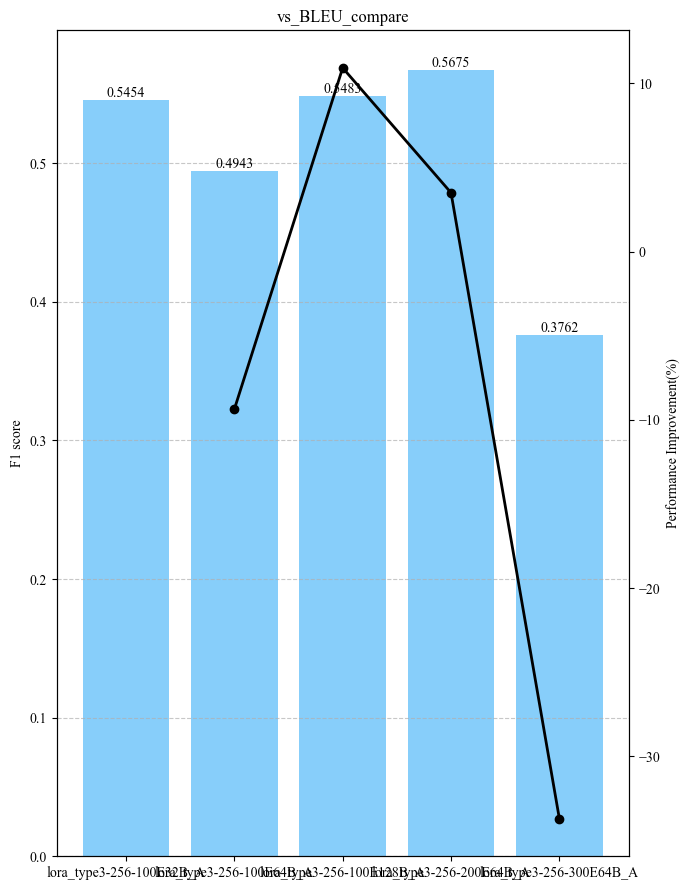

In [28]:
bleu_graph(the_name)